In [28]:
# Import our modules
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

# Pull data from the csv
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Check the number of rows in the dataset
index = heart_data.index
print(len(index))

303


There are 14 attributes for 303 individuals in this data set. The last attribute, "target", indicates whether or not an individual has heart disease. The remaining attributes are listed below as continuous or categorical, based on the documentation in the original Kaggle dataset.

The following attributes are continuous:

 - age
 - trestbps (resting blood pressure)
 - chol (serum cholestoral in mg/dl)
 - thalach (maximum heart rate achieved)
 - oldpeak (ST depression induced by exercise relative to rest)
 - slope (the slope of the peak exercise ST segment)*

The following attributes are categorical:

 - sex (1, 0)
 - cp (0 for no chest pain or 1-4 for different types of chest pain)
 - fbs (1 = fasting blood sugar > 120 mg/dl = 1; 0 = fbs <= 120 mg/dl)
 - restecg (resting electrocardiographic results, 0 - 2)
 - exang (exercise induced angina, 1 = yes; 0 = no)
 - thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
 - ca (number of major vessels, 0-4, colored by flourosopy)

_We will check the slope range further on, as first glance at the data suggests it may more closely resemble a categorical variable. Feature scaling could also bring other continuous values into a similar range._


In [30]:
# Set seed for reproducibility
np.random.seed(0)

## Check for Missing Values

In [31]:
# Find missing value counts in each column
heart_missing_values = heart_data.isnull().sum()

# Find how many values are missing in our columns
heart_missing_values[0:13]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Thankfully, we do not have any missing values! The Data World smiles upon us. 

## Check for Duplicate Values

Because the data are all continuous and categorical and there are no unique values like subject IDs, we expect there will be duplicate values in all of the categorical fields and some duplicates in the continuous variables. We can take a look at the duplicates in the age column out of curiousity.

In [32]:
heart_data.duplicated(subset=['age'])

0      False
1      False
2      False
3      False
4      False
       ...  
298     True
299     True
300     True
301     True
302     True
Length: 303, dtype: bool

This makes sense; the first 5 rows come back as "False" because those numbers have not yet been repeated. By the end of the dataset, each individual's age has already appeared in the column.

# View Histograms of Each Variable

This will give us an idea of the range and distribution of each variable before we consider removing outliers.

<ipython-input-33-56f00d6fccd3>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  heart_data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

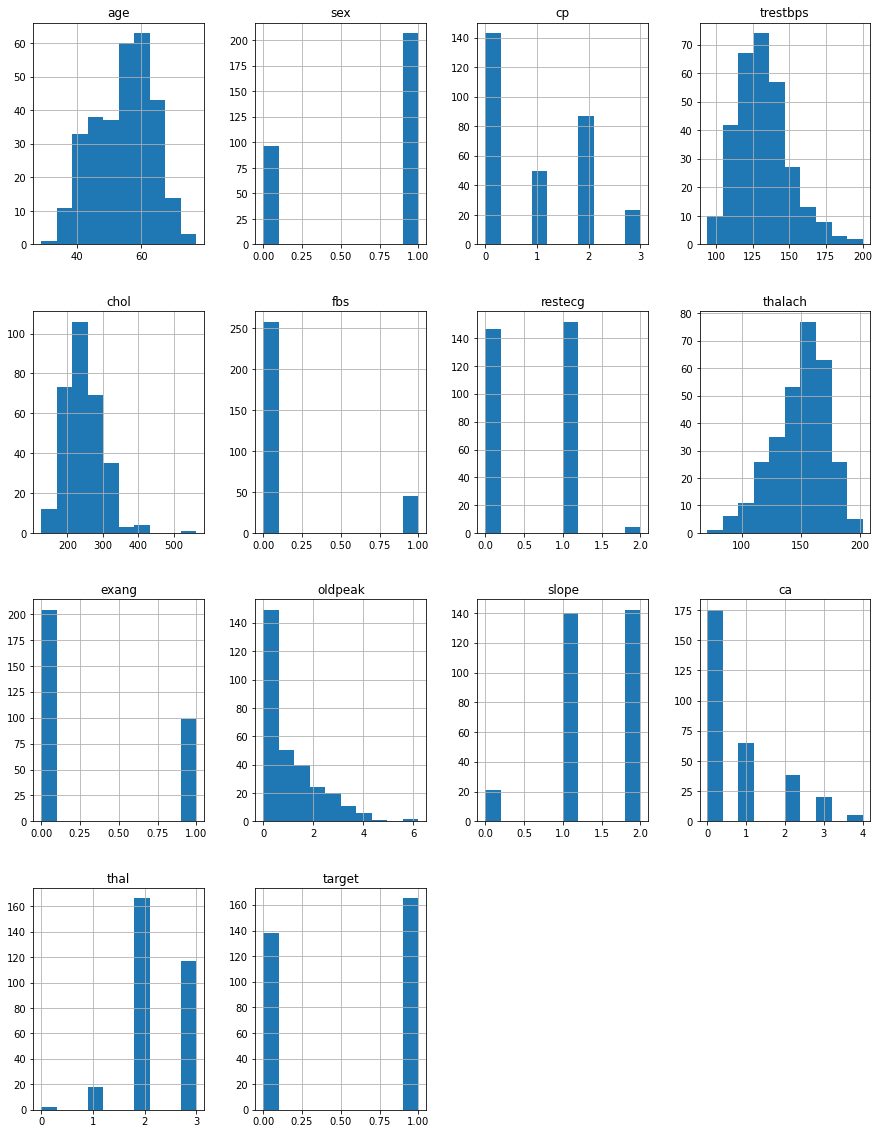

In [33]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)

# Check Descriptive Statistics

In [34]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Remove Outliers

Based on the histograms and descriptive statistics, it makes the most sense to check our cholesterol and "oldpeak" variables for outliers and remove those that appear to be skewing the data. The histograms for both cholesterol and "oldpeak" are strongly skewed to the right and have maximums more than two standard deviations greater than the means. Also, based on common sense, a cholesterol value of 564 seems extremely high. 

In [35]:
from scipy import stats

# Remove outliers from cholesterol (4 outliers) -- I could edit this to just remove outliers greater than 500
heart_data = heart_data[(np.abs(stats.zscore(heart_data['chol'])) < 3)]

index = heart_data.index
print(len(index))

# Remove outliers from oldpeak (2 outliers)
heart_data = heart_data[(np.abs(stats.zscore(heart_data['oldpeak'])) < 3)]

index = heart_data.index
print(len(index))

# Note to self: if I run this cell multiple times it will continue removing rows from the dataset because the zscore will change each time.

299
297


We can now check the histograms and descriptive statistics again to see if the skew remains.

<ipython-input-36-56f00d6fccd3>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  heart_data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

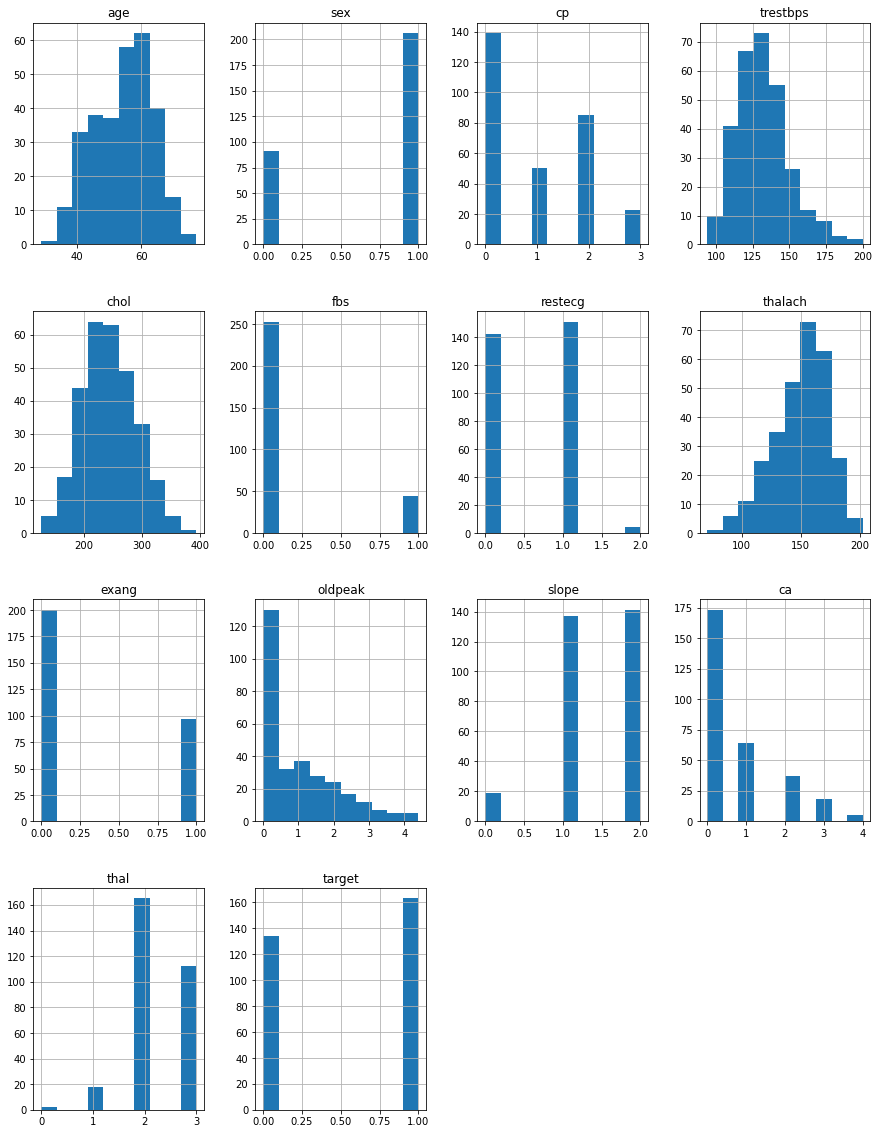

In [36]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)

In [37]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.00000,297.000000
mean,54.225589,0.693603,0.973064,131.457912,243.905724,0.148148,0.535354,149.717172,0.326599,0.992929,1.410774,0.713805,2.30303,0.548822
std,9.097053,0.461775,1.032879,17.564334,45.751952,0.355846,0.525944,23.011912,0.469761,1.086115,0.609290,1.011210,0.61162,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.00000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.00000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.00000,1.000000


While oldpeak still has a strong right skew, cholesterol now has a more normal distribution. I will feel more comfortable normalizing these features when building a model.

# Examine Relationships between Initial Variables and Target

I will look at heat maps and scatterplots to examine the relationship between different features and the target. If features appear to be strongly correlated with one another, that is useful to know for the purposes of feature engineering. 

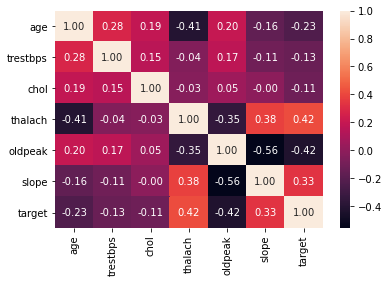

In [38]:
# Heat map of continuous variables and their relationship to the target

list1 = ["age", "trestbps", "chol", "thalach", "oldpeak", "slope", "target"]
sns.heatmap(heart_data[list1].corr(), annot = True, fmt = ".2f")
plt.show()

## Heat Map Observations for Continuous Variables
 - Age, resting blood pressure and cholesterol appear to have a slight negative correlation (-0.23, -0.13 and -0.11, respectively) to an individual having heart disease. 
 - Oldpeak (ST depression) appears to have a moderate negative correlation (-0.42) to having heart disease.
 - Maximum heart rate achieved and slope appear to have moderate positive correlations (0.42 and 0.33) to having heart disease.

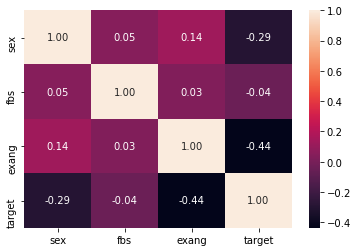

In [39]:
# Heat map of binary variables and their relationship to target

list2 = ["sex", "fbs", "exang", "target"]
sns.heatmap(heart_data[list2].corr(), annot = True, fmt = ".2f")
plt.show()

## Heat Map Observations for Binary Variables

 - Sex has a moderate negative correlation with heart disease (-0.29). The female sex as measured in this study, then, is slightly correlated with heart disease.
 - Fasting blood sugar (fbs) above 120 mg/dl does not appear to have a notable correlation with heart disease (-0.04).
 - Having exercise induced angina is also moderately negative correlated with heart disease (-0.44), which is counter to what we might expect.

## Chi-Square Tests for Binary Variables

In [61]:
# Chi-square tests for each binary relationship
# I will need the counts in each category for this - should be able to use pandas

# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)

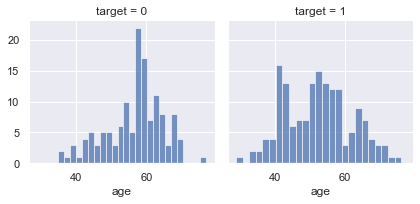

In [63]:
# Histograms of age and whether or not someone has heart disease (1 = yes, 0 = no)

sns.set_theme(style="darkgrid")

g = sns.FacetGrid(heart_data, col = "target")
g.map(sns.histplot, "age", bins = 25)
plt.show()

The histogram of those who do have heart disease has three relative peaks, while the histogram of those who do not has a peak around 60. It's important to note that this is a relatively small dataset, with fewer than 300 examples (once outliers are removed), so this distribution poten

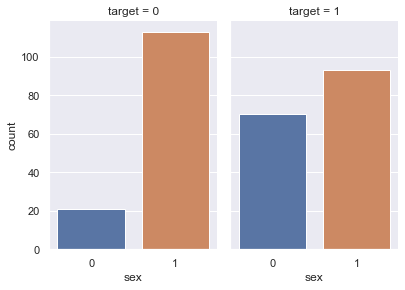

In [57]:
# Count plots of sex and whether or not someone has heart disease (1 = yes, 0 = no)

ax = sns.catplot(x="sex", col="target",
                data=heart_data, kind="count",
                height=4, aspect=.7)


This count plot bears out the correlation observed. There is a higher incidence of heart disease in women than in men in this sample.

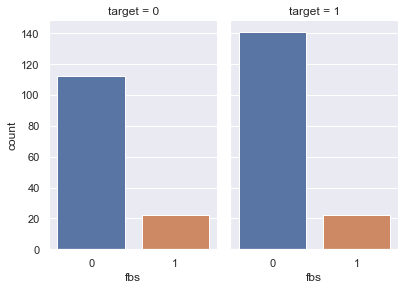

In [58]:
# Count plots of fasting blood sugar (1 = fbs > 120 mg/dl) and whether or not someone has heart disease (1 = yes, 0 = no)

ax = sns.catplot(x="fbs", col="target",
                data=heart_data, kind="count",
                height=4, aspect=.7)


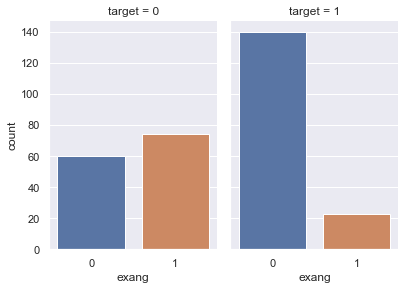

In [59]:
# Count plots of exercise induced angina (1 = yes) and whether or not someone has heart disease (1 = yes, 0 = no)

ax = sns.catplot(x="exang", col="target",
                data=heart_data, kind="count",
                height=4, aspect=.7)